<a href="https://colab.research.google.com/github/Chinmai22/Drug-Prediction-using-ML/blob/main/Decision%20Tree%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drug200.csv")

In [ ]:
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


M    104
F     96
Name: Sex, dtype: int64


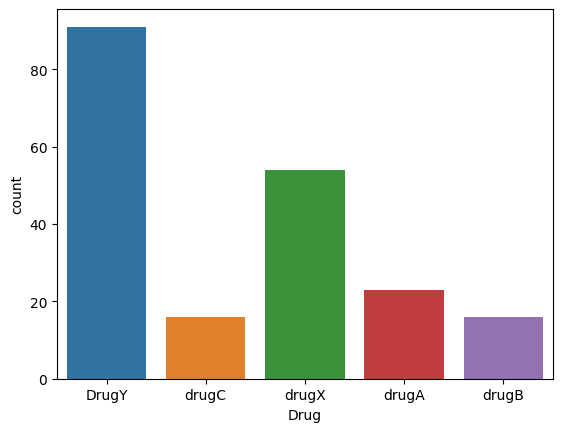

In [ ]:
x=df.Sex.value_counts()
print(x)
p=sns.countplot(data=df,x="Drug")
plt.show()

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64


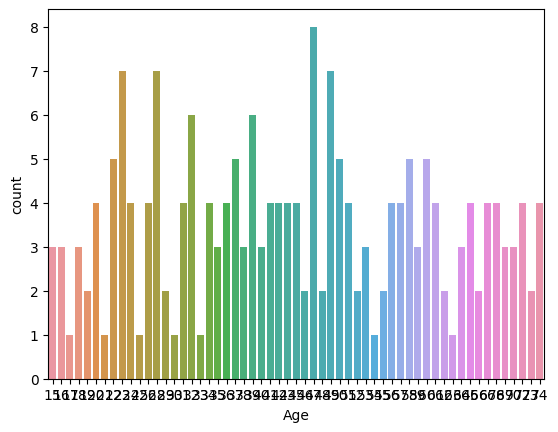

In [ ]:
x=df.Age.value_counts()
print(x)
p=sns.countplot(data=df,x="Age")
plt.show()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


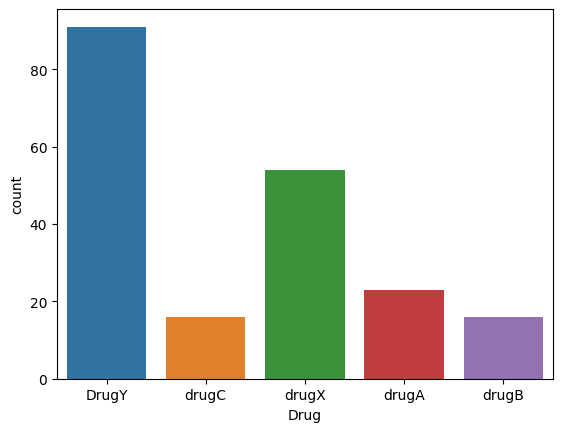

In [ ]:
x=df.Drug.value_counts()
print(x)
p=sns.countplot(data=df,x="Drug")
plt.show()

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<Figure size 1000x1000 with 0 Axes>

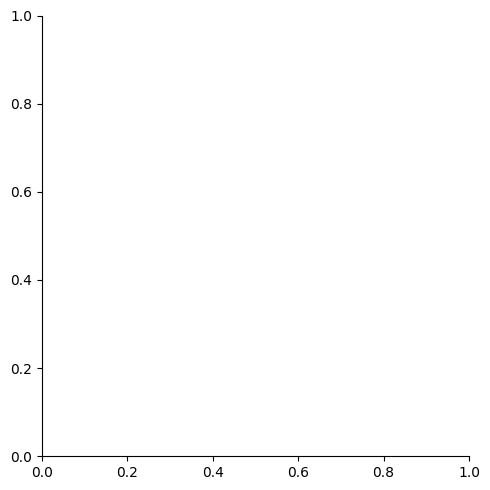

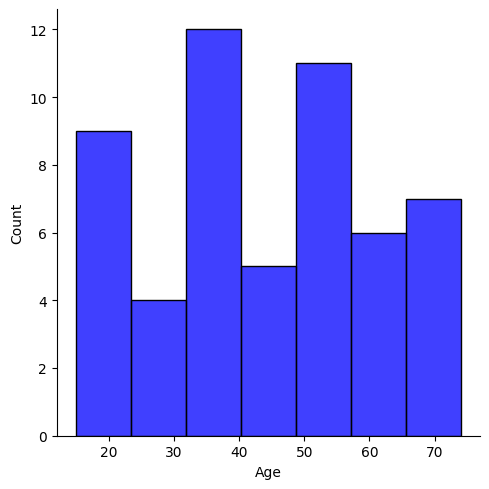

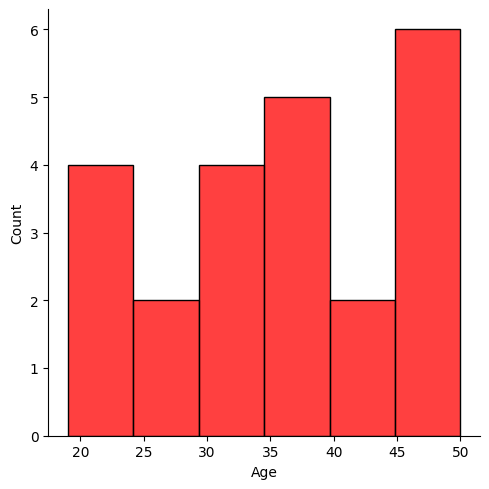

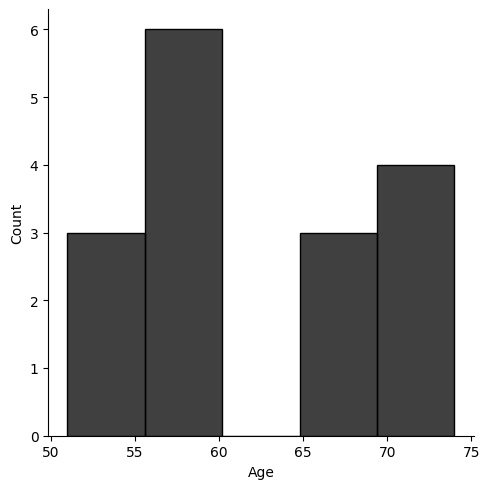

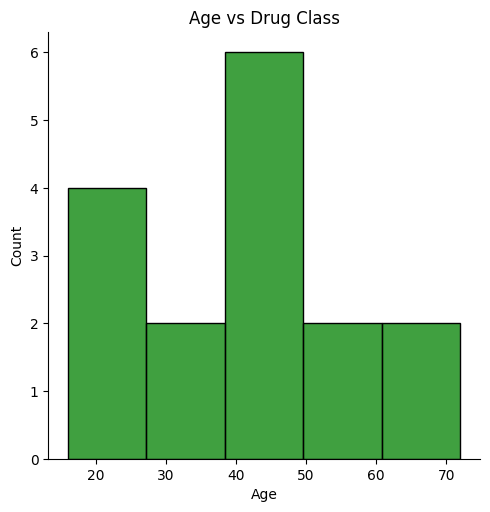

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df[df['Drug']=='drugY']['Age'],color='green',)
sns.displot(df[df['Drug']=='drugX']['Age'],color='blue',)
sns.displot(df[df['Drug']=='drugA']['Age'],color='red',)
sns.displot(df[df['Drug']=='drugB']['Age'],color='black',)
sns.displot(df[df['Drug']=='drugC']['Age'],color='green',)
plt.title("Age vs Drug Class")
plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['BP']=oe.fit_transform(df[['BP']])
df['Sex']=oe.fit_transform(df[['Sex']])
df['Cholesterol']=oe.fit_transform(df[['Cholesterol']])
df['Drug']=oe.fit_transform(df[['Drug']])


In [ ]:
df

Age  Sex   BP  Cholesterol  Na_to_K  Drug
0     23  0.0  0.0          0.0   25.355   0.0
1     47  1.0  1.0          0.0   13.093   3.0
2     47  1.0  1.0          0.0   10.114   3.0
3     28  0.0  2.0          0.0    7.798   4.0
4     61  0.0  1.0          0.0   18.043   0.0
..   ...  ...  ...          ...      ...   ...
195   56  0.0  1.0          0.0   11.567   3.0
196   16  1.0  1.0          0.0   12.006   3.0
197   52  1.0  2.0          0.0    9.894   4.0
198   23  1.0  2.0          1.0   14.020   4.0
199   40  0.0  1.0          1.0   11.349   4.0

[200 rows x 6 columns]

In [ ]:
df=df.iloc[:, :-1]


In [ ]:
df

Age  Sex   BP  Cholesterol  Na_to_K  Drug
0     23  0.0  0.0          0.0   25.355   0.0
1     47  1.0  1.0          0.0   13.093   3.0
2     47  1.0  1.0          0.0   10.114   3.0
3     28  0.0  2.0          0.0    7.798   4.0
4     61  0.0  1.0          0.0   18.043   0.0
..   ...  ...  ...          ...      ...   ...
195   56  0.0  1.0          0.0   11.567   3.0
196   16  1.0  1.0          0.0   12.006   3.0
197   52  1.0  2.0          0.0    9.894   4.0
198   23  1.0  2.0          1.0   14.020   4.0
199   40  0.0  1.0          1.0   11.349   4.0

[200 rows x 6 columns]

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
x


Age  Sex   BP  Cholesterol  Na_to_K
0     23  0.0  0.0          0.0   25.355
1     47  1.0  1.0          0.0   13.093
2     47  1.0  1.0          0.0   10.114
3     28  0.0  2.0          0.0    7.798
4     61  0.0  1.0          0.0   18.043
..   ...  ...  ...          ...      ...
195   56  0.0  1.0          0.0   11.567
196   16  1.0  1.0          0.0   12.006
197   52  1.0  2.0          0.0    9.894
198   23  1.0  2.0          1.0   14.020
199   40  0.0  1.0          1.0   11.349

[200 rows x 5 columns]

In [ ]:
y

0      0.0
1      3.0
2      3.0
3      4.0
4      0.0
      ... 
195    3.0
196    3.0
197    4.0
198    4.0
199    4.0
Name: Drug, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [ ]:
x_train

Age  Sex   BP  Cholesterol  Na_to_K
169   20  0.0  0.0          0.0   11.262
97    56  0.0  0.0          0.0   25.395
31    74  1.0  0.0          0.0    9.567
12    43  1.0  1.0          0.0   15.376
35    46  1.0  2.0          1.0    7.285
..   ...  ...  ...          ...      ...
106   22  1.0  2.0          0.0   11.953
14    50  0.0  2.0          0.0   12.703
92    29  0.0  0.0          0.0   29.450
179   67  0.0  2.0          0.0   15.891
102   28  0.0  1.0          0.0   13.127

[140 rows x 5 columns]

In [ ]:
y_train

169    1.0
97     0.0
31     2.0
12     0.0
35     4.0
      ... 
106    4.0
14     4.0
92     0.0
179    0.0
102    3.0
Name: Drug, Length: 140, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=0)
clf_gini.fit(x_train,y_train)
y_pred_gini=clf_gini.predict(x_test)

In [ ]:
y_pred_gini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1., 4., 4., 4., 0., 0., 3., 0., 0., 0., 4., 4.,
       0., 4., 0., 4., 0., 1., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini,y_test))

1.0


[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [65, 16, 13, 10, 36]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.676\nsamples = 75\nvalue = [0, 16, 13, 10, 36]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.495\nsamples = 29\nvalue = [0, 16, 13, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.34\nsamples = 46\nvalue = [0, 0, 0, 10, 36]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 0, 10, 11]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 11]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 0, 25]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 65\nvalue = [65, 0, 0, 0, 0]')]

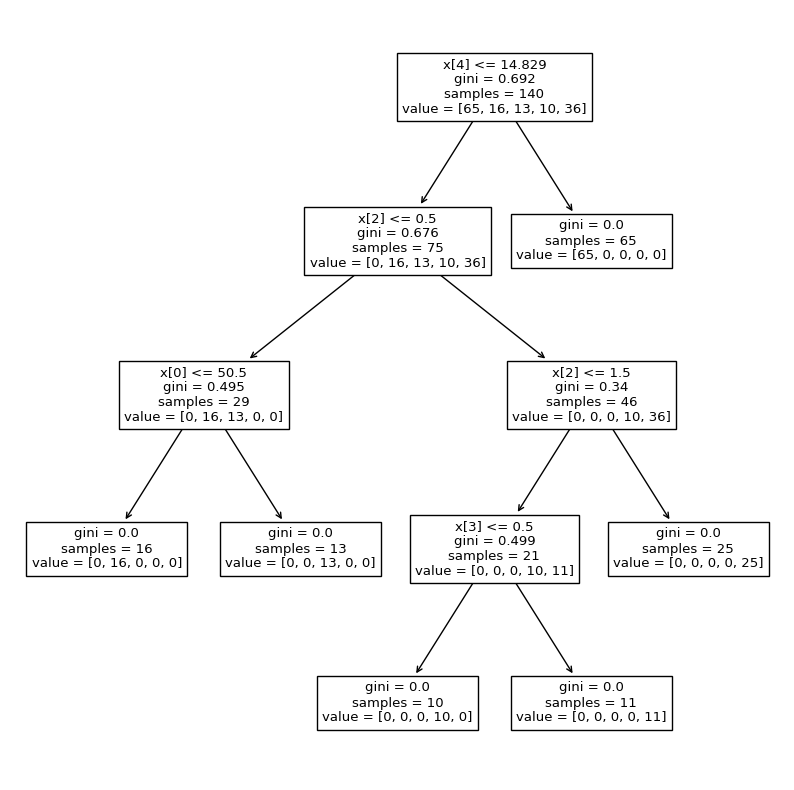

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [ ]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_entropy.fit(x_train,y_train)
y_pred_entropy=clf_entropy.predict(x_test)

0.9


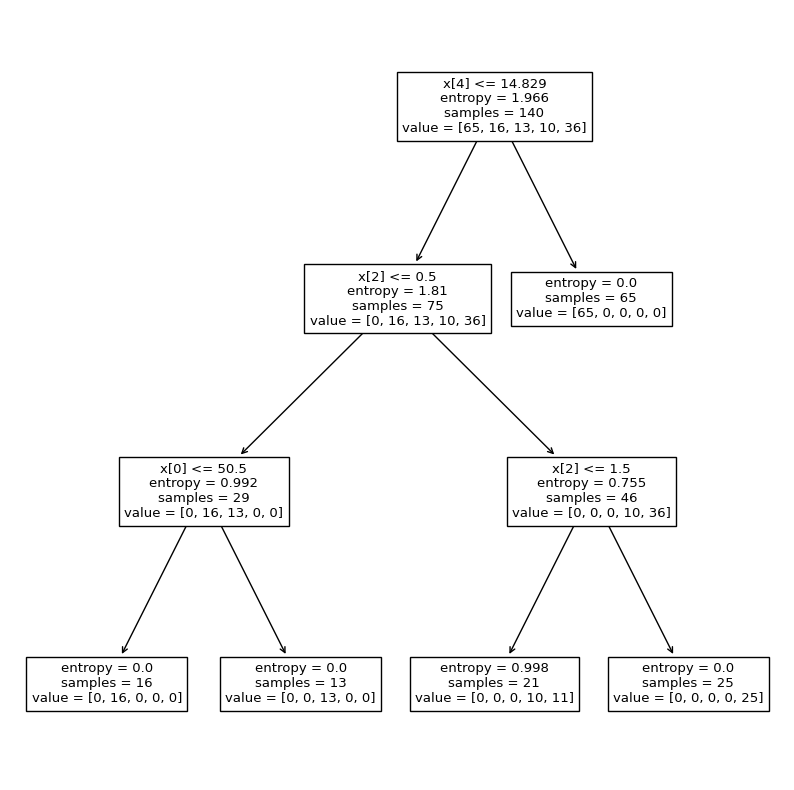

In [ ]:
print(accuracy_score(y_test,y_pred_entropy))
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(x_train,y_train))
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
k_folds = 5